In [1]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df = df[df['job_title_short']=='Data Scientist']

In [4]:
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",sql,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",python,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",r,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,bigquery,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gdpr,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,git,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gitlab,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."


In [5]:
df_exploded.groupby('job_skills').size()

job_skills
airflow       3915
airtable        65
alteryx       2068
angular        736
angular.js      12
              ... 
wrike            8
wsl             31
xamarin          5
yarn           249
zoom           361
Length: 237, dtype: int64

In [11]:

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

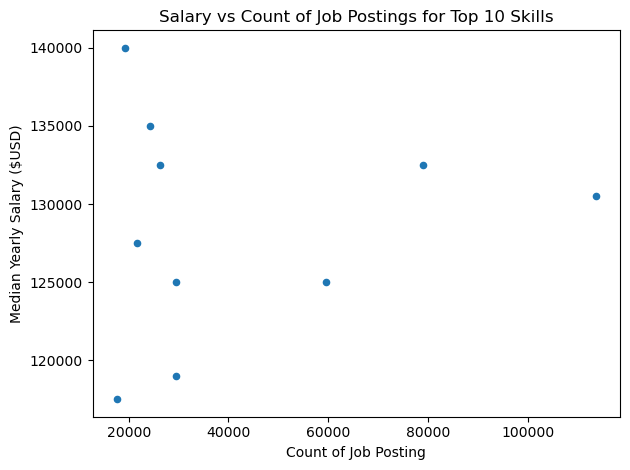

In [14]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

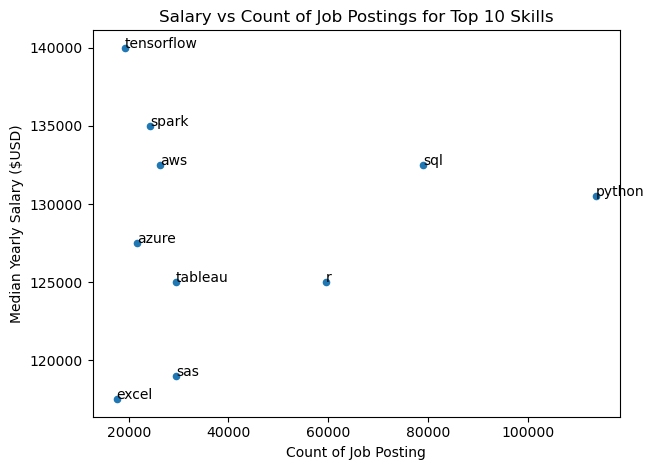

In [17]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()
